# Age Estimation

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Project 8 Part b

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Project 8 Part b


In [13]:
import os
import numpy as np
import torch
from helperT import *
from helperP import *

import torch
import numpy as np
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import torchvision

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism. 

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)] 
    val_loader        -- tensor,(y, x), [(32),(32, 2048)] 
    test_loader       -- tensor,(y, x), [(32),(32, 2048)] 
```

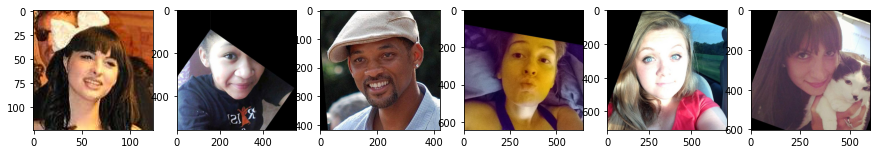

In [14]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results 
```


In [8]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out = self.linear(x)

        return out

In [9]:
## Test ##
model = LinearClassifier(10, 2)
x = torch.zeros((5, 10))
y = model(x)
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

test passed


# softmax + CELoss

=> training finished


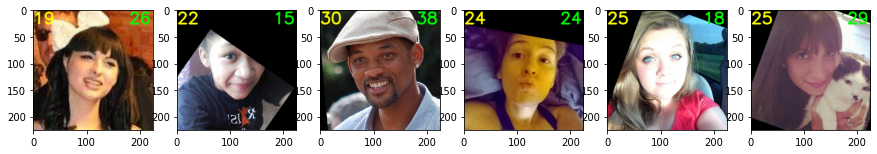

In [15]:
def train_softmax_cel():
    # Define model
    model = LinearClassifier(2048, 101)   
    model = model.cuda()
    
    # Define SGD optimizer to update our weights and bias
    optimizer = optim.SGD(model.parameters(),lr = 1e-3)
    
    # Define criterion to calculate loss
    criterion = nn.CrossEntropyLoss()

    for e in range(EPOCH):
        # Training model
        model.train()

        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            x, y = x.cuda().float(), y.cuda().long() 
            # calculate the gradient and update the model

            optimizer.zero_grad() #zero the gradients calculated so far

            outputs = model(x) #forward pass
            loss = criterion(outputs, y) #calculates loss

            loss.backward() #calculates gradients and goes through the computational graph of the model
            optimizer.step() #updates the paramenters of the model


       # Validating model
        model.eval()
        gt = []
        preds = []

        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            ############################################# 
            # Calculate the validation outputs and error
            x, y = x.cuda().float(), y.cuda().long()  

            outputs = model(x) #forward pass
            loss = criterion(outputs, y) #calculates error

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(outputs, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)

        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        
    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

# Test and Generate results file

In [ ]:
# Unable to define F

prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])